In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# 1️⃣ Load and Merge Data

pd.set_option('display.max_columns', None)

DATA_PATH = ""  # 🔁 update path if needed
os.makedirs("outputs", exist_ok=True)

train_transaction = pd.read_csv(os.path.join(DATA_PATH, "train_transaction.csv"))
train_identity = pd.read_csv(os.path.join(DATA_PATH, "train_identity.csv"))
train_df = train_transaction.merge(train_identity, on='TransactionID', how='left')
print("✅ Merged dataset shape:", train_df.shape)


✅ Merged dataset shape: (590540, 434)



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
None

💰 Fraud Percentage: 3.50%


C:\Users\darsh\AppData\Local\Temp\ipykernel_15108\2683790352.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=train_df, palette='Set2')


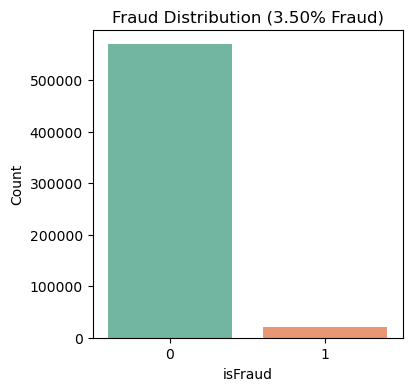

In [5]:
# 2️⃣ Basic Overview

print("\nData Info:")
print(train_df.info())

fraud_rate = train_df['isFraud'].mean() * 100
print(f"\n💰 Fraud Percentage: {fraud_rate:.2f}%")

plt.figure(figsize=(4,4))
sns.countplot(x='isFraud', data=train_df, palette='Set2')
plt.title(f"Fraud Distribution ({fraud_rate:.2f}% Fraud)")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

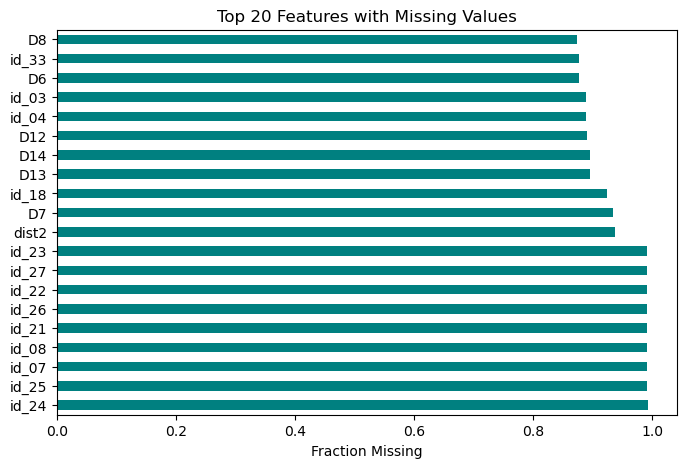

📁 Missing summary saved -> outputs/missing_summary.csv


In [6]:
# 3️⃣ Missing Value Analysis

missing = train_df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]
plt.figure(figsize=(8, 5))
missing.head(20).plot(kind='barh', color='teal')
plt.title("Top 20 Features with Missing Values")
plt.xlabel("Fraction Missing")
plt.show()

missing_summary = train_df.isnull().sum().reset_index()
missing_summary.columns = ['Feature', 'MissingCount']
missing_summary['MissingPercent'] = (missing_summary['MissingCount'] / len(train_df)) * 100
missing_summary.to_csv("outputs/missing_summary.csv", index=False)
print("📁 Missing summary saved -> outputs/missing_summary.csv")

📁 Numeric summary saved -> outputs/numeric_summary.csv


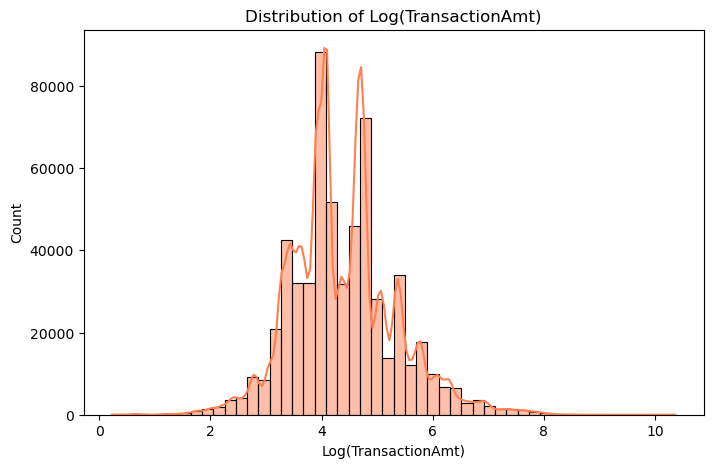

In [7]:
# 4️⃣ Numeric & Categorical Summary

numeric_features = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_features = train_df.select_dtypes(exclude=np.number).columns.tolist()

numeric_summary = train_df[numeric_features].describe().T
numeric_summary.to_csv("outputs/numeric_summary.csv")
print("📁 Numeric summary saved -> outputs/numeric_summary.csv")

# Transaction Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train_df['TransactionAmt']), bins=50, kde=True, color='coral')
plt.title("Distribution of Log(TransactionAmt)")
plt.xlabel("Log(TransactionAmt)")
plt.show()


🔝 Top 10 correlated numeric features with isFraud:
V257    0.383060
V246    0.366878
V244    0.364129
V242    0.360590
V201    0.328005
V200    0.318783
V189    0.308219
V188    0.303582
V258    0.297151
V45     0.281832
Name: isFraud, dtype: float64


C:\Users\darsh\AppData\Local\Temp\ipykernel_15108\3720394013.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='mako')


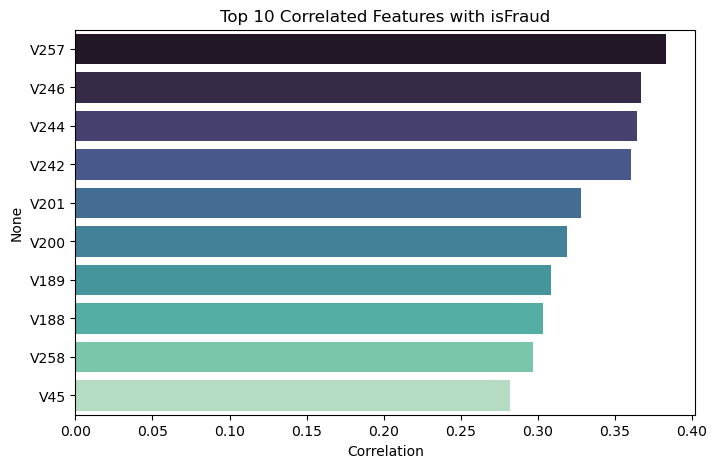

In [8]:
# 5️⃣ Correlation with isFraud

corr = train_df[numeric_features].corr()['isFraud'].sort_values(ascending=False)
top_corr = corr[1:11]
print("\n🔝 Top 10 correlated numeric features with isFraud:")
print(top_corr)

plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='mako')
plt.title("Top 10 Correlated Features with isFraud")
plt.xlabel("Correlation")
plt.show()

In [9]:
# 6️⃣ Preprocessing for Modeling

selected_features = [
    'TransactionAmt', 'card4', 'card6', 'ProductCD',
    'P_emaildomain', 'R_emaildomain', 'isFraud'
]
clean_df = train_df[selected_features].copy()

# Handle missing values
for col in clean_df.select_dtypes('object'):
    clean_df[col] = clean_df[col].fillna('Unknown')

# One-hot encode categoricals
clean_df = pd.get_dummies(clean_df, drop_first=True)

clean_df.to_csv("outputs/cleaned_train.csv", index=False)
print("✅ Cleaned dataset saved -> outputs/cleaned_train.csv")

print("\n🚀 Preprocessing complete.")
print(f"Final feature count: {clean_df.shape[1]}")
print(f"Output files generated in /outputs folder.")

✅ Cleaned dataset saved -> outputs/cleaned_train.csv

🚀 Preprocessing complete.
Final feature count: 133
Output files generated in /outputs folder.
